Epoch 1/11
71/71 [==============================] - 15s 195ms/step - loss: 2.1877 - accuracy: 0.1710 - val_loss: 1.9903 - val_accuracy: 0.2530
Epoch 2/11
71/71 [==============================] - 13s 190ms/step - loss: 1.9216 - accuracy: 0.2906 - val_loss: 1.7396 - val_accuracy: 0.3540
Epoch 3/11
71/71 [==============================] - 14s 191ms/step - loss: 1.7250 - accuracy: 0.3638 - val_loss: 1.6975 - val_accuracy: 0.3700
Epoch 4/11
71/71 [==============================] - 13s 190ms/step - loss: 1.6006 - accuracy: 0.4116 - val_loss: 1.5271 - val_accuracy: 0.4340
Epoch 5/11
71/71 [==============================] - 13s 190ms/step - loss: 1.4862 - accuracy: 0.4543 - val_loss: 1.4426 - val_accuracy: 0.4630
Epoch 6/11
71/71 [==============================] - 14s 195ms/step - loss: 1.3746 - accuracy: 0.5012 - val_loss: 1.3080 - val_accuracy: 0.5260
Epoch 7/11
71/71 [==============================] - 15s 217ms/step - loss: 1.3033 - accuracy: 0.5246 - val_loss: 1.2645 - val_accuracy: 0.5270

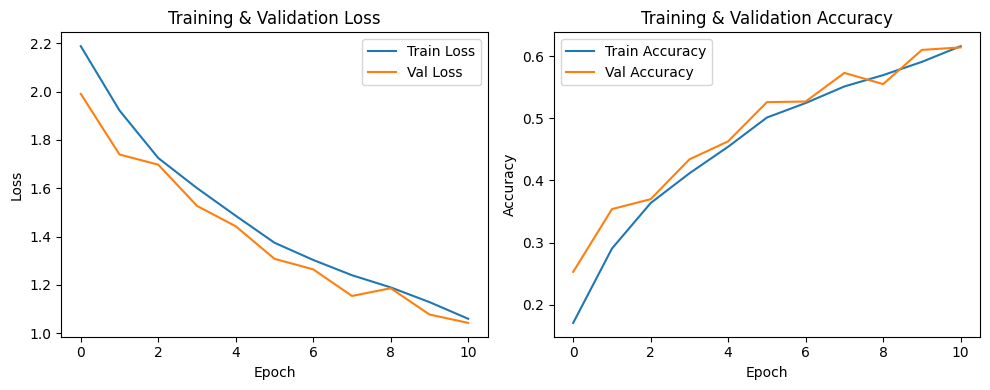

In [5]:
# ============================================================
# CNN Model for CIFAR-10 Image Classification (LP-IV Problem 4)
# ============================================================

# a. Loading and preprocessing the image data
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load data
train = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv', nrows=10000)
test  = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv',  nrows=2000)

X_train = train.drop('label', axis=1).values.astype('float32') / 255.0
y_train = train['label'].values
X_test  = test.drop('label', axis=1).values.astype('float32') / 255.0
y_test  = test['label'].values

# reshape safely
X_train = X_train.reshape(-1, 32, 32, 3)
X_test  = X_test.reshape(-1, 32, 32, 3)


# Separate features and labels
X_train = train.drop('label', axis=1).values
y_train = train['label'].values
X_test = test.drop('label', axis=1).values
y_test = test['label'].values

# Normalize and reshape
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32') / 255.0

# ------------------------------------------------------------
# b. Defining the model’s architecture (Deeper CNN)
# ------------------------------------------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# ------------------------------------------------------------
# c. Training the model
# ------------------------------------------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=11, batch_size=128,
                    validation_split=0.1, verbose=1)

# ------------------------------------------------------------
# d. Estimating the model’s performance
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training loss and accuracy
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
